In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Extracting Features

In [2]:
path="Data/"
features = list()
with open(path+"Features.txt") as f:
    for line in f:
        features.append(line.split()[1])
print(len(features))


561


## Reading train data

In [3]:
train_df = pd.read_csv(path+"train/X_train.txt", delim_whitespace = True)
train_df.columns = features
# print(train_df)

train_df["subject_id"] = pd.read_csv(path+"train/subject_train.txt", header = None, squeeze = True) #squeeze = True will 
# #return data in pandas series format

train_df["activity"] = pd.read_csv(path+"train/y_train.txt", header = None, squeeze = True)

activity = pd.read_csv(path+"train/y_train.txt", header = None, squeeze = True)

#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

train_df["activity_name"] = label_name

train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5,STANDING


In [4]:
print("Size of Train data = {}".format(train_df.shape))

Size of Train data = (7351, 564)


## Reading test Data

In [5]:
test_df = pd.read_csv(path+"test/X_test.txt", delim_whitespace = True)
test_df.columns = features

test_df["subject_id"] = pd.read_csv(path+"test/subject_test.txt", header = None, squeeze = True) #squeeze = True will 
#return data in pandas series format

test_df["activity"] = pd.read_csv(path+"/test/y_test.txt", header = None, squeeze = True)

activity = pd.read_csv(path+"test/y_test.txt", header = None, squeeze = True)

#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

test_df["activity_name"] = label_name

test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,5,STANDING


In [6]:
# Checking for nan values
print("Number of NaN values in train data is "+str(train_df.isnull().sum().sum()))
print("Number of NaN values in test data is "+str(test_df.isnull().sum().sum()))

Number of NaN values in train data is 0
Number of NaN values in test data is 0


In [7]:
# Checking for duplicate values
print("Number of duplicate values in train data is "+str(sum(train_df.duplicated())))
print("Number of duplicate values in test data is "+str(sum(test_df.duplicated())))

Number of duplicate values in train data is 0
Number of duplicate values in test data is 0


## Changing Feature Name

In [8]:
columns = train_df.columns
columns = columns.str.replace("[()]", '') 
columns = columns.str.replace("-", '')
columns = columns.str.replace(",", '')

#here, columns is of type pandas index. By writing "columns.str" we have changed its type to 
#pandas string. Pandas string has method called replace which we have used here.

train_df.columns = columns
test_df.columns = columns

In [9]:
train_df.columns
features_clean=train_df.columns

print(type(features_clean))

<class 'pandas.core.indexes.base.Index'>


In [10]:
train_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject_id,activity,activity_name
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5,STANDING


## PCA

In [11]:

x = train_df.loc[:,features_clean[:-2]].values
print(x)
y = train_df.loc[:,['activity_name']].values
print(y)

x = StandardScaler().fit_transform(x)


print(x)

[[ 2.7841883e-01 -1.6410568e-02 -1.2352019e-01 ...  1.8028889e-01
  -5.4316717e-02  1.0000000e+00]
 [ 2.7965306e-01 -1.9467156e-02 -1.1346169e-01 ...  1.8063731e-01
  -4.9117815e-02  1.0000000e+00]
 [ 2.7917394e-01 -2.6200646e-02 -1.2328257e-01 ...  1.8193476e-01
  -4.7663183e-02  1.0000000e+00]
 ...
 [ 2.7338737e-01 -1.7010616e-02 -4.5021828e-02 ...  2.4914484e-01
   4.0811188e-02  3.0000000e+01]
 [ 2.8965416e-01 -1.8843044e-02 -1.5828059e-01 ...  2.4643223e-01
   2.5339478e-02  3.0000000e+01]
 [ 3.5150347e-01 -1.2423118e-02 -2.0386717e-01 ...  2.4680852e-01
   3.6694843e-02  3.0000000e+01]]
[['STANDING']
 ['STANDING']
 ['STANDING']
 ...
 ['WALKING_UPSTAIRS']
 ['WALKING_UPSTAIRS']
 ['WALKING_UPSTAIRS']]
[[ 0.05597152  0.03147488 -0.25395122 ...  0.40914928  0.00787361
  -1.82878084]
 [ 0.07353784 -0.0434222  -0.07634749 ...  0.41032053  0.0264995
  -1.82878084]
 [ 0.06671871 -0.2084162  -0.24975554 ...  0.41468205  0.03171096
  -1.82878084]
 ...
 [-0.01563933  0.01677161  1.13210055 .

In [37]:
# train_df.DataFrame(data = x, columns = features_clean).head()
pca = PCA(n_components=250)
print(pca)

PCA(copy=True, iterated_power='auto', n_components=250, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [38]:
principalComponents = pca.fit_transform(x)


In [39]:
# columns = ['principal component 1', 'principal component 2']
columns=[]
for i in range(0,250):
#     name=
#     print(name)
    columns.append("principal component "+str(i))
principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)
principalDf.head(5)

,principal component 0,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,...,principal component 240,principal component 241,principal component 242,principal component 243,principal component 244,principal component 245,principal component 246,principal component 247,principal component 248,principal component 249
0,-17.420761,2.715373,0.374565,-0.295619,-0.349197,0.089167,4.095604,3.130319,-0.191224,-2.212231,...,-0.016537,-0.008501,-0.185902,0.064560,0.044145,-0.016592,-0.128833,-0.100725,-0.047248,-0.094193
1,-17.275403,3.461746,0.120217,-1.614420,0.210575,-0.214929,4.762317,2.765861,0.130284,-2.130896,...,-0.113412,0.026718,0.076785,0.216074,0.008783,0.110352,-0.228020,-0.116754,-0.041428,0.017298
2,-17.420410,4.627074,-0.462697,-1.907286,0.041929,-0.025962,3.540762,1.599060,0.495863,-2.500311,...,0.017887,0.004084,0.070215,0.001504,0.133182,0.076719,-0.069857,-0.115078,0.044567,0.064850
3,-17.555420,5.217899,-0.621104,-2.270766,-0.412428,0.185553,4.023375,2.018861,-0.226109,-1.266647,...,0.063991,-0.125675,0.116911,0.191532,-0.041156,0.042189,-0.093255,-0.037408,-0.102136,-0.116870
4,-17.406087,5.226194,-0.803661,-2.389275,-0.460416,0.176774,3.790310,1.160631,-0.448351,-0.325440,...,-0.134384,0.016404,-0.021715,0.287080,-0.012823,0.009229,0.045496,-0.024023,0.282043,-0.003743


In [40]:
print("Size of Test data = {}".format(principalDf.shape))

Size of Test data = (7351, 250)


In [41]:
# finalDf = train_df.concat([principalDf, train_df[['activity_name']]], axis = 1)
principalDf["activity_name"]=train_df.loc[:,["activity_name"]]
# finalDf.head(5)
# print(principalDf)

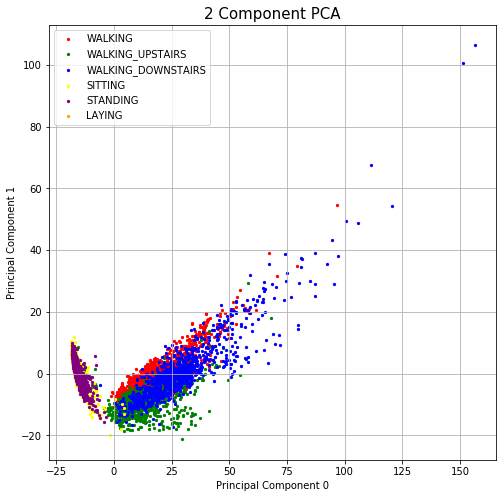

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 0', fontsize = 10)
ax.set_ylabel('Principal Component 1', fontsize = 10)
ax.set_title('2 Component PCA', fontsize = 15)


targets = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',"SITTING","STANDING","LAYING"]
colors = ['r', 'g', 'b', 'yellow', 'purple','orange']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['activity_name'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 0']
               , principalDf.loc[indicesToKeep, 'principal component 1']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

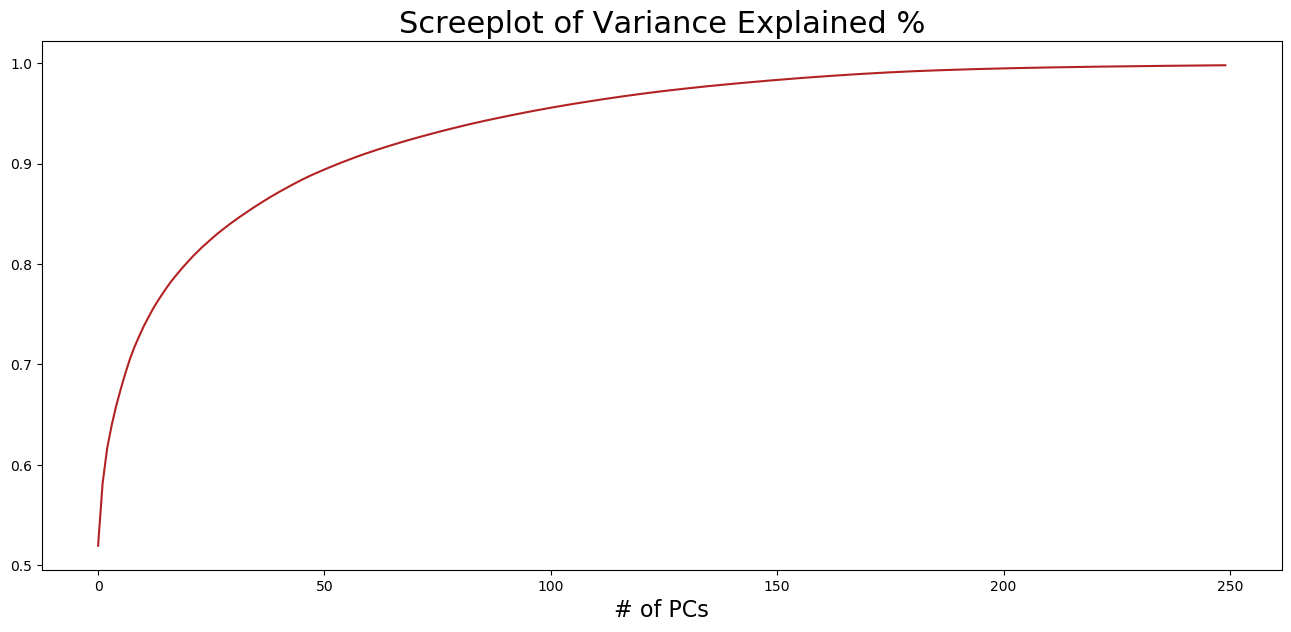

In [43]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum()
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()